# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + "City"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"][0]["lat"]
        city_lng = city_weather["coord"][0]["lon"]
        city_max_temp = city_weather["main"][0]["temp_max"]
        city_humidity = city_weather["main"][0]["humidity"]
        city_clouds = city_weather["clouds"][0]["all"]
        city_wind = city_weather["wind"][0]["speed"]
        city_country = city_weather["sys"][0]["country"]
        city_date = city_weather["sys"][0]["id"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | baykit
City not found. Skipping...
Processing Record 2 of Set 1 | lata
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | talnakh
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 7 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 8 of Set 1 | midland
City not found. Skipping...
Processing Record 9 of Set 1 | hilo
City not found. Skipping...
Processing Record 10 of Set 1 | karaton
City not found. Skipping...
Processing Record 11 of Set 1 | provideniya
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
City not found. Skipping...
Processing Record 13 of Set 1 | ancud
City not found. Skipping...
Processing Record 14 of Set 1 | thompson
City not found. Skippi

City not found. Skipping...
Processing Record 19 of Set 3 | borogontsy
City not found. Skipping...
Processing Record 20 of Set 3 | torbay
City not found. Skipping...
Processing Record 21 of Set 3 | taoudenni
City not found. Skipping...
Processing Record 22 of Set 3 | noumea
City not found. Skipping...
Processing Record 23 of Set 3 | dikson
City not found. Skipping...
Processing Record 24 of Set 3 | saint anthony
City not found. Skipping...
Processing Record 25 of Set 3 | abu zabad
City not found. Skipping...
Processing Record 26 of Set 3 | san rafael del sur
City not found. Skipping...
Processing Record 27 of Set 3 | aloleng
City not found. Skipping...
Processing Record 28 of Set 3 | kavieng
City not found. Skipping...
Processing Record 29 of Set 3 | zolotkovo
City not found. Skipping...
Processing Record 30 of Set 3 | atuona
City not found. Skipping...
Processing Record 31 of Set 3 | hithadhoo
City not found. Skipping...
Processing Record 32 of Set 3 | pitsunda
City not found. Skippin

City not found. Skipping...
Processing Record 38 of Set 5 | bilyayivka
City not found. Skipping...
Processing Record 39 of Set 5 | along
City not found. Skipping...
Processing Record 40 of Set 5 | tigil
City not found. Skipping...
Processing Record 41 of Set 5 | henties bay
City not found. Skipping...
Processing Record 42 of Set 5 | colomi
City not found. Skipping...
Processing Record 43 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 5 | halifax
City not found. Skipping...
Processing Record 45 of Set 5 | samusu
City not found. Skipping...
Processing Record 46 of Set 5 | ozgon
City not found. Skipping...
Processing Record 47 of Set 5 | thinadhoo
City not found. Skipping...
Processing Record 48 of Set 5 | vanimo
City not found. Skipping...
Processing Record 49 of Set 5 | akureyri
City not found. Skipping...
Processing Record 0 of Set 6 | ciudad barrios
City not found. Skipping...
Processing Record 1 of Set 6 | san luis
City not found. Skipping...
Processi

City not found. Skipping...
Processing Record 9 of Set 8 | iskateley
City not found. Skipping...
Processing Record 10 of Set 8 | upernavik
City not found. Skipping...
Processing Record 11 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 8 | faanui
City not found. Skipping...
Processing Record 13 of Set 8 | likasi
City not found. Skipping...
Processing Record 14 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 15 of Set 8 | chifeng
City not found. Skipping...
Processing Record 16 of Set 8 | kui buri
City not found. Skipping...
Processing Record 17 of Set 8 | bowen
City not found. Skipping...
Processing Record 18 of Set 8 | mount gambier
City not found. Skipping...
Processing Record 19 of Set 8 | shihezi
City not found. Skipping...
Processing Record 20 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 21 of Set 8 | skelleftea
City not found. Skipping...
Processing Record 22 of Set 8 | gobabis
City not found. 

City not found. Skipping...
Processing Record 27 of Set 10 | namatanai
City not found. Skipping...
Processing Record 28 of Set 10 | rincon
City not found. Skipping...
Processing Record 29 of Set 10 | guerrero negro
City not found. Skipping...
Processing Record 30 of Set 10 | lodwar
City not found. Skipping...
Processing Record 31 of Set 10 | moron
City not found. Skipping...
Processing Record 32 of Set 10 | maniitsoq
City not found. Skipping...
Processing Record 33 of Set 10 | shakawe
City not found. Skipping...
Processing Record 34 of Set 10 | sao joaquim
City not found. Skipping...
Processing Record 35 of Set 10 | tabas
City not found. Skipping...
Processing Record 36 of Set 10 | marfino
City not found. Skipping...
Processing Record 37 of Set 10 | lufilufi
City not found. Skipping...
Processing Record 38 of Set 10 | vagur
City not found. Skipping...
Processing Record 39 of Set 10 | chapais
City not found. Skipping...
Processing Record 40 of Set 10 | blagoyevo
City not found. Skipping

City not found. Skipping...
Processing Record 44 of Set 12 | prince rupert
City not found. Skipping...
Processing Record 45 of Set 12 | gualaco
City not found. Skipping...
Processing Record 46 of Set 12 | qaqortoq
City not found. Skipping...
Processing Record 47 of Set 12 | bathsheba
City not found. Skipping...
Processing Record 48 of Set 12 | barcelos
City not found. Skipping...
Processing Record 49 of Set 12 | zaysan
City not found. Skipping...
Processing Record 0 of Set 13 | narwar
City not found. Skipping...
Processing Record 1 of Set 13 | tijara
City not found. Skipping...
Processing Record 2 of Set 13 | cravo norte
City not found. Skipping...
Processing Record 3 of Set 13 | oyon
City not found. Skipping...
Processing Record 4 of Set 13 | bardiyah
City not found. Skipping...
Processing Record 5 of Set 13 | auki
City not found. Skipping...
Processing Record 6 of Set 13 | vila
City not found. Skipping...
Processing Record 7 of Set 13 | diego de almagro
City not found. Skipping...
--

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#city_data_df=pd.DataFrame(city_data_df)
# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [19]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

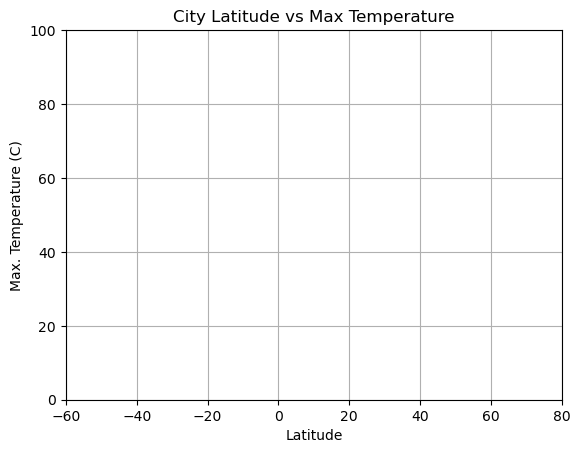

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

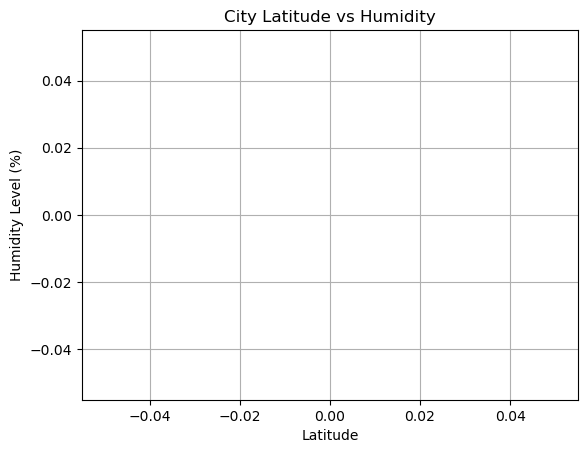

In [21]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

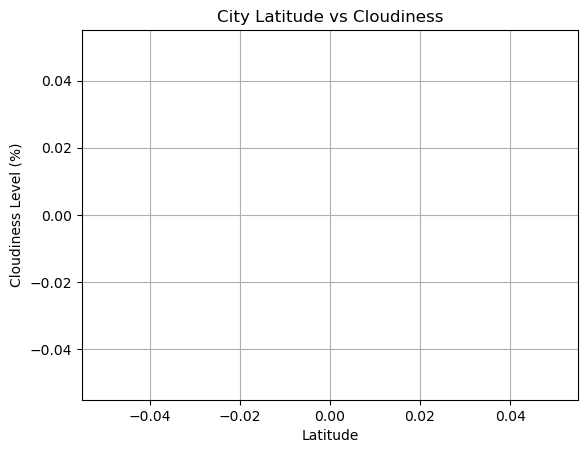

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

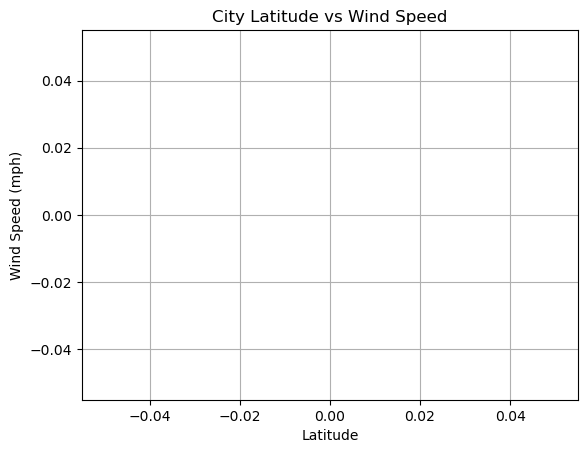

In [23]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0.00]

# Display sample data
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<-0.01]
# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


###  Temperature vs. Latitude Linear Regression Plot

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

ValueError: Inputs must not be empty.

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

ValueError: Inputs must not be empty.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

ValueError: Inputs must not be empty.

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")

ValueError: Inputs must not be empty.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE